<div style="text-align:center; background-color:#001F3F; color:white; padding:10px;">
    <h1>Etude de marché : La poule qui chante </h1>
</div>

### Sommaire

* [Etape 1 - Importation des librairies et chargement des fichiers](#importation-librairies)
  * [1.1 - Importation des librairies](#1-importation-librairies)
  * [1.2 - Chargement des fichiers](#chargement-fichiers)

* [Etape 2 - Analyse du fichier disponibiliteAlimentaire](#analyse-disponibiliteAlimentaire)
  * [2.1 - Analyse exploratoire](#analyse-exploratoire)
  * [2.2 - Vérification des incohérences](#verification-incoherences)
    * [2.2.1 - Vérification des valeurs nulles](#verification-valeurs-nulles)
    * [2.2.2 - Vérification des doublons](#verification-doublons)
    * [2.2.3 - Vérification des valeurs de la colonne année](#verification-valeurs-annee)
  * [3.3 - Nettoyage du data set](#nettoyage-dataset-dispo)
    * [2.3.1 - Filtrer par produit](#produit)
    * [2.3.2 - Nettoyage des colonnes](#nettoyage-colonne)
  * [2.4 - identification des Valeurs Aberrantes](#valeurs-aberrantes)
    * [2.4.1 - Boxplot](#production)
      
* [Etape 3 - Analyse du fichier population](#analyse-population)
  * [3.1 - Analyse exploratoire](#analyse-exploratoire-population)
  * [3.2 - Vérification des incohérences](#verification-incoherences-population)
    * [3.2.1 - Vérification des valeurs nulles](#verification-valeurs-nulles-population)
    * [3.2.2 - Vérification des doublons](#verification-doublons-population)
    * [3.2.3 - Vérification des valeurs de la colonne année](#verification-valeurs-annee-population)
    * [3.2.4 - Vérification des valeurs négatives](#verification-valeurs-negatives-population)
  * [3.3 - Nettoyage du data set](#nettoyage-dataset-pop)
  
* [Etape 4 - Merger les data set](#merge)
    * [4.1 - Vérification de l'unicité des pays dans chaque DataFrame](#unicite-pays)
    * [4.2 - Merge](#merge2)
    * [4.3 - Valeurs manquantes](#valeursmanquantes)
    
* [Etape 5 - Analyse](#analyse)
    * [5.1 - Analyse univariée](#univarie)
      * [5.1.1 - Analyse descriptive](#descriptive)
      * [5.1.2 - Boxplot](#Boxplot)
      * [5.1.2 - Analyse de la normalité](#normalite)
    * [5.2 - Analyse bivariée](#bivarie)
      * [5.2.2 - Heatmap](#heatmap)
      * [5.2.2 - Nettoyage des données du data set final](#dataset-final)
      
    * [5.3 - Analyse exploratoire multidimensionnelle](#multidimensionnelle)
      * [5.2.1 - Analyse en composantes principales (ACP)](#acp)

<div id="importation-librairies" style="border: 2px solid #001F3F; background-color: #77B5FE; padding: 10px; text-align: center;">
    <h2 style="font-weight: bold; color: #001F3F;">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div id="1-importation-librairies" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">1.1 - Importation des librairies</h3>
</div>


In [1]:
#Importation des librairies
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import locale
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from plotly.io import write_image
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import plotly.graph_objects as go
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import silhouette_score

<div id="chargement-fichiers" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">1.2 - Chargement des fichiers</h3>
</div>
<hr style="border: 1px solid #0074CC;">

In [2]:
#Importation des fichiers
disponibiliteAlimentaire = pd.read_csv('/Users/Bouboule/Documents/Projet 9/DAN-P9-data/DisponibiliteAlimentaire_2017.csv')
population = pd.read_csv('/Users/Bouboule/Documents/Projet 9/DAN-P9-data/Population_2000_2018.csv')

<div id="analyse-disponibiliteAlimentaire" style="border: 2px solid #001F3F; background-color: #77B5FE; padding: 10px; text-align: center;">
    <h2 style="font-weight: bold; color: #001F3F;">Etape 2 - Analyse du fichier disponibiliteAlimentaire</h2>
</div>

<div id="analyse-exploratoire" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">2.1 - Analyse exploratoire</h3>
</div>
<hr style="border: 1px solid #0074CC;">

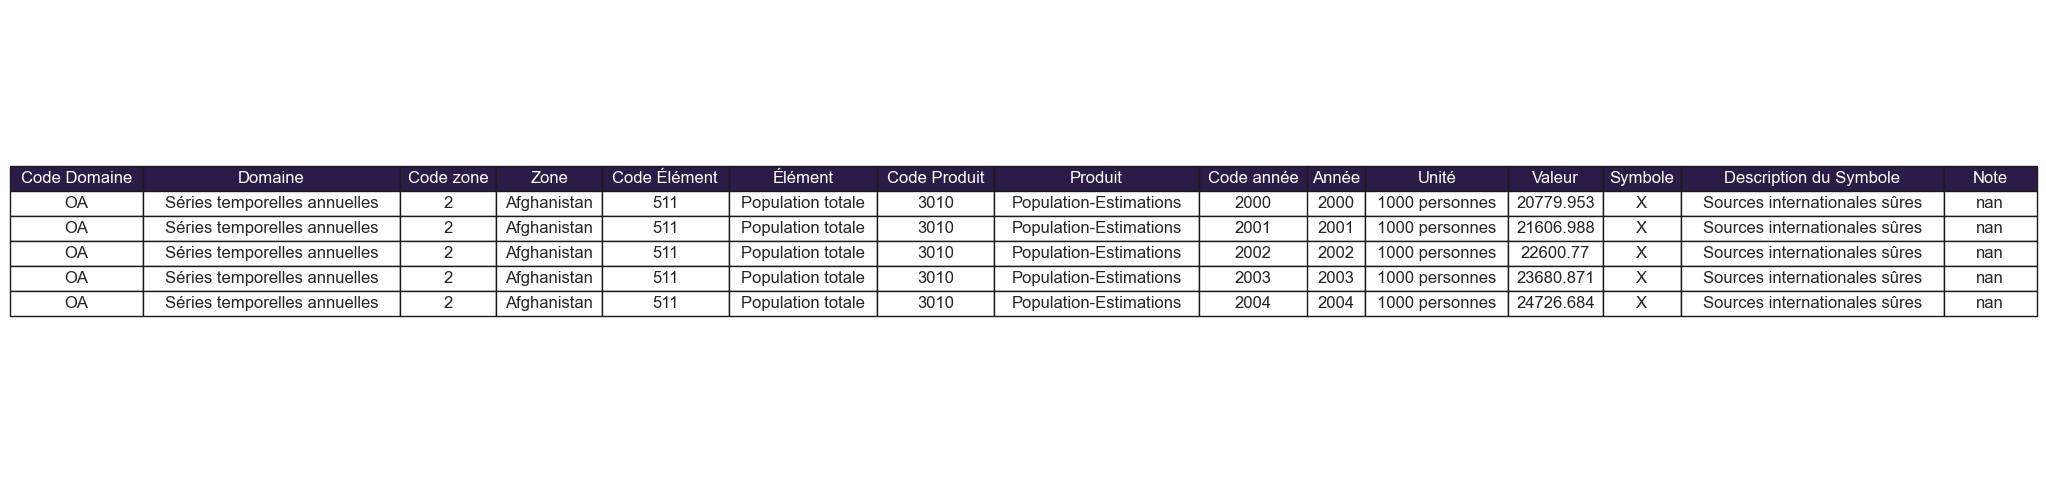

In [3]:
# Sélectionner les premières lignes
data_head = population.head()

# Configuration de l'affichage de seaborn
sns.set(style="whitegrid")

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(12, 6))  # Augmenter la taille de la figure

# Supprimer l'axe
ax.axis('off')

# Créer le tableau
table = ax.table(cellText=data_head.values, colLabels=data_head.columns, cellLoc='center', loc='center')

# Ajuster la taille des cellules
table.auto_set_font_size(False)
table.set_fontsize(12)  # Augmenter la taille de la police
table.scale(1.5, 1.5)  # Augmenter l'échelle des cellules

# Appliquer une couleur d'entête et un fond blanc pour les autres cellules
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Si c'est une cellule d'entête (première ligne)
        cell.set_facecolor('#2C1B47')  # Couleur violet foncé pour l'entête
        cell.set_text_props(color='white')  # Texte blanc
    else:
        cell.set_facecolor('#FFFFFF')  # Fond blanc pour les autres cellules

# Ajuster la largeur des colonnes
col_widths = [0.15, 0.15, 0.1, 0.15, 0.1, 0.1, 0.15, 0.1, 0.1, 0.15, 0.15, 0.15, 0.1, 0.15]  # Exemple de largeurs ajustées
for i, width in enumerate(col_widths):
    table.auto_set_column_width(i)  # Ajuste la largeur de chaque colonne automatiquement

# Sauvegarder l'image
plt.savefig('population_head_colored.png', bbox_inches='tight', dpi=300)
plt.show()


In [4]:
#Consulter les infos du dataframe
disponibiliteAlimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [5]:
#Affichage des 5 premières lignes de la table
disponibiliteAlimentaire.head()

Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code Élément                   Élément  Code Produit          Produit  \
0          5511                Production          2511  Blé et produits   
1          5611   Importations - Quantité          2511  Blé et produits   
2          5072        Variation de stock          2511  Blé et produits   
3          5911   Exportations - Quantité          2511  Blé et produits   
4          5301  Disponibilité intérieure          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   
2        2017   2017  Milliers de tonnes  -119.0       S   
3        2017   2017  Milliers de tonnes     0.0       S   
4        2017   2017  Milliers de tonnes  6701.0       S   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
2  Données standardisées  
3  Données standardisées  
4  Données standardisées

<div id="verification-incoherences" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">2.2 - Vérification des incohérences</h3>
</div>
<hr style="border: 1px solid #0074CC;">

<h4 id="verification-valeurs-nulles" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.2.1 - Vérification des valeurs nulles</h4>
<hr style="border: 1px solid #0074CC;">

In [6]:
disponibiliteAlimentaire.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

<h4 id="verification-doublons" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.2.2 - Vérification des doublons</h4>
<hr style="border: 1px solid #0074CC;">

In [7]:
disponibiliteAlimentaire.duplicated().sum()

0

<h4 id="verification-valeurs-annee" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.2.3 - Vérification des valeurs de la colonne année</h4>
<hr style="border: 1px solid #0074CC;">

In [8]:
# Afficher les valeurs uniques de la colonne "Année"
print(disponibiliteAlimentaire['Année'].unique())

# Vérifier la plage des années
print("Années min:", disponibiliteAlimentaire['Année'].min())
print("Années max:", disponibiliteAlimentaire['Année'].max())

[2017]
Années min: 2017
Années max: 2017


<div id="nettoyage-dataset-dispo" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">2.3 - Nettoyage du data set</h3>
</div>
<hr style="border: 1px solid #0074CC;">

<h4 id="produit" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.3.1 - Filtrer par produit</h4>
<hr style="border: 1px solid #0074CC;">

In [9]:
disponibiliteAlimentaire_filtré = disponibiliteAlimentaire[disponibiliteAlimentaire['Produit'] == 'Viande de Volailles']
disponibiliteAlimentaire_filtré.head()

Code Domaine                      Domaine  Code zone         Zone  \
651          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
652          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
653          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
654          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
655          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

     Code Élément                   Élément  Code Produit  \
651          5511                Production          2734   
652          5611   Importations - Quantité          2734   
653          5072        Variation de stock          2734   
654          5301  Disponibilité intérieure          2734   
655          5123                    Pertes          2734   

                 Produit  Code année  Année               Unité  Valeur  \
651  Viande de Volailles        2017   2017  Milliers de tonnes    28.0   
652  Viande de Volailles        2017   2017  Milliers de tonnes    29.0   
653  Viande de Volailles        2017   2017  Milliers de tonnes     0.0   
654  Viande de Volailles        2017   2017  Milliers de tonnes    57.0   
655  Viande de Volailles        2017   2017  Milliers de tonnes     2.0   

    Symbole Description du Symbole  
651       S  Données standardisées  
652       S  Données standardisées  
653       S  Données standardisées  
654       S  Données standardisées  
655       S  Données standardisées

<h4 id="nettoyage-colonne" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.3.2 - Nettoyage des colonnes</h4>
<hr style="border: 1px solid #0074CC;">

In [10]:
colonnes_a_conserver = ['Zone', 'Élément', 'Valeur','Description du Symbole']
disponibiliteAlimentaire_clean = disponibiliteAlimentaire_filtré[colonnes_a_conserver]

# Afficher les premières lignes du DataFrame nettoyé pour vérifier
disponibiliteAlimentaire_clean.head()

Zone                   Élément  Valeur Description du Symbole
651  Afghanistan                Production    28.0  Données standardisées
652  Afghanistan   Importations - Quantité    29.0  Données standardisées
653  Afghanistan        Variation de stock     0.0  Données standardisées
654  Afghanistan  Disponibilité intérieure    57.0  Données standardisées
655  Afghanistan                    Pertes     2.0  Données standardisées

In [11]:
disponibiliteAlimentaire_clean['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

In [12]:
pivot_disponibiliteAlimentaire = disponibiliteAlimentaire_clean.pivot_table(index='Zone', columns='Élément', values='Valeur', aggfunc='sum')

# Sélectionner seulement les colonnes nécessaires.
columns_of_interest = ['Production', 'Importations - Quantité', 'Disponibilité intérieure', 'Nourriture', 
                       'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité alimentaire (Kcal/personne/jour)']
final_disponibiliteAlimentaire = pivot_disponibiliteAlimentaire[columns_of_interest].reset_index()

final_disponibiliteAlimentaire.info()
final_disponibiliteAlimentaire.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    172 non-null    object 
 1   Production                                              168 non-null    float64
 2   Importations - Quantité                                 170 non-null    float64
 3   Disponibilité intérieure                                170 non-null    float64
 4   Nourriture                                              170 non-null    float64
 5   Disponibilité alimentaire en quantité (kg/personne/an)  172 non-null    float64
 6   Disponibilité alimentaire (Kcal/personne/jour)          172 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB


Élément            Zone  Production  Importations - Quantité  \
0           Afghanistan        28.0                     29.0   
1        Afrique du Sud      1667.0                    514.0   
2               Albanie        13.0                     38.0   
3               Algérie       275.0                      2.0   
4             Allemagne      1514.0                    842.0   

Élément  Disponibilité intérieure  Nourriture  \
0                            57.0        55.0   
1                          2118.0      2035.0   
2                            47.0        47.0   
3                           277.0       264.0   
4                          1739.0      1609.0   

Élément  Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                     1.53        
1                                                    35.69        
2                                                    16.36        
3                                                     6.38        
4                                                    19.47        

Élément  Disponibilité alimentaire (Kcal/personne/jour)  
0                                                   5.0  
1                                                 143.0  
2                                                  85.0  
3                                                  22.0  
4                                                  71.0

<div id="valeurs-aberrantes" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">2.4 - identification des Valeurs Aberrantes</h3>
</div>
<hr style="border: 1px solid #0074CC;">

<h4 id="production" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.4.1 - Boxplot</h4>
<hr style="border: 1px solid #0074CC;">

In [13]:
fig = go.Figure()

columns = ['Production', 'Importations - Quantité', 'Disponibilité intérieure', 'Nourriture',
           'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité alimentaire (Kcal/personne/jour)']

for col in columns:
    fig.add_trace(go.Box(y=final_disponibiliteAlimentaire[col], name=col))

fig.update_layout(
    title="Box Plots pour Visualiser les Distributions et Valeurs Aberrantes",
    yaxis_title="Valeur",
    boxmode='group' 
)

fig.show()

<div id="analyse-population" style="border: 2px solid #001F3F; background-color: #77B5FE; padding: 10px; text-align: center;">
    <h2 style="font-weight: bold; color: #001F3F;">Etape 3 - Analyse du fichier population</h2>
</div>

<div id="analyse-exploratoire-population" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">3.1 - Analyse exploratoire</h3>
</div>
<hr style="border: 1px solid #0074CC;">


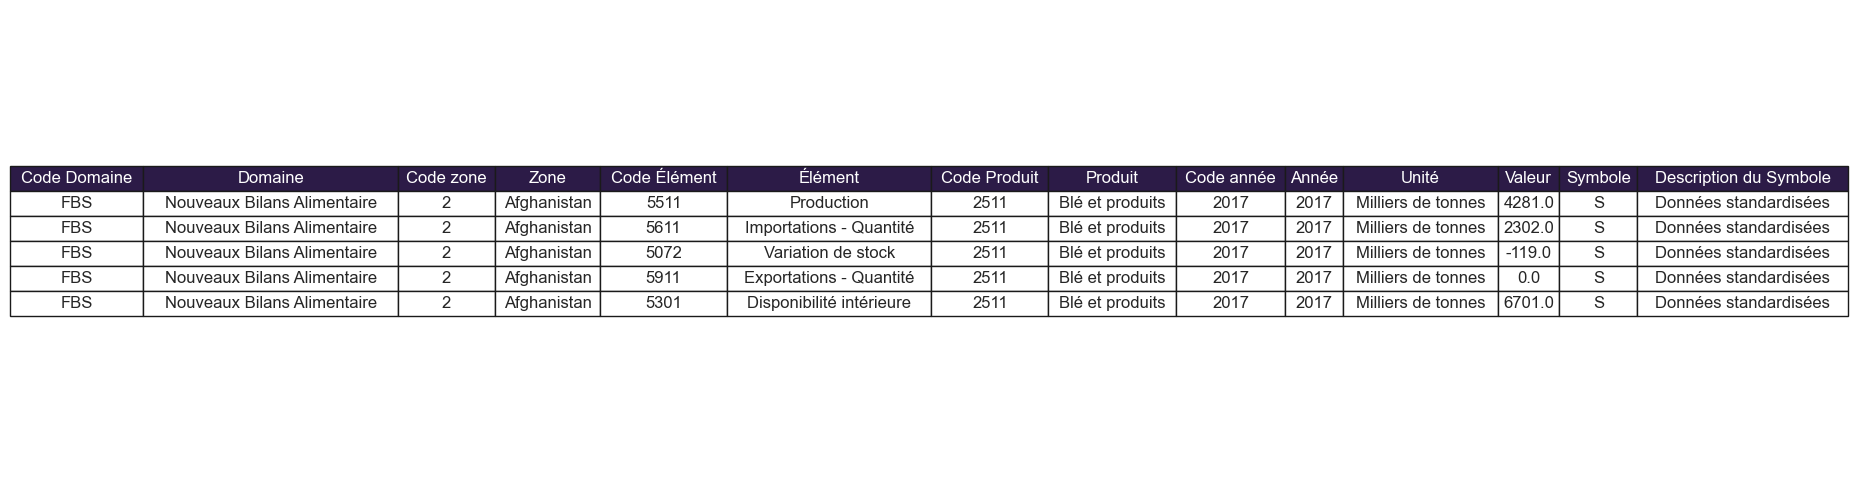

In [14]:
# Sélectionner les premières lignes
data_head = disponibiliteAlimentaire.head()

# Configuration de l'affichage de seaborn
sns.set(style="whitegrid")

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(12, 6))  # Augmenter la taille de la figure

# Supprimer l'axe
ax.axis('off')

# Créer le tableau
table = ax.table(cellText=data_head.values, colLabels=data_head.columns, cellLoc='center', loc='center')

# Ajuster la taille des cellules
table.auto_set_font_size(False)
table.set_fontsize(12)  # Augmenter la taille de la police
table.scale(1.5, 1.5)  # Augmenter l'échelle des cellules

# Appliquer une couleur d'entête et un fond blanc pour les autres cellules
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Si c'est une cellule d'entête (première ligne)
        cell.set_facecolor('#2C1B47')  # Couleur violet foncé pour l'entête
        cell.set_text_props(color='white')  # Texte blanc
    else:
        cell.set_facecolor('#FFFFFF')  # Fond blanc pour les autres cellules

# Ajuster la largeur des colonnes
col_widths = [0.15, 0.15, 0.1, 0.15, 0.1, 0.1, 0.15, 0.1, 0.1, 0.15, 0.15, 0.15, 0.1, 0.15]  # Exemple de largeurs ajustées
for i, width in enumerate(col_widths):
    table.auto_set_column_width(i)  # Ajuste la largeur de chaque colonne automatiquement

# Sauvegarder l'image
plt.savefig('disponibiliteAlimentaire_head_colored.png', bbox_inches='tight', dpi=300)
plt.show()


In [15]:
#Consulter les infos du dataframe
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [16]:
#Affichage des 5 premières lignes de la table
population.head()

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2000   2000  1000 personnes  20779.953       X   
1        2001   2001  1000 personnes  21606.988       X   
2        2002   2002  1000 personnes  22600.770       X   
3        2003   2003  1000 personnes  23680.871       X   
4        2004   2004  1000 personnes  24726.684       X   

          Description du Symbole Note  
0  Sources internationales sûres  NaN  
1  Sources internationales sûres  NaN  
2  Sources internationales sûres  NaN  
3  Sources internationales sûres  NaN  
4  Sources internationales sûres  NaN

<h3 id="verification-incoherences-population" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">3.2 - Vérification des incohérences</h3>
<hr style="border: 1px solid #0074CC;">

<h4 id="verification-valeurs-nulles-population" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">3.2.1 - Vérification des valeurs nulles</h4>
<hr style="border: 1px solid #0074CC;">

In [17]:
population.isnull().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

<h4 id="verification-doublons-population" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">3.2.2 - Vérification des doublons</h4>
<hr style="border: 1px solid #0074CC;">

In [18]:
population.duplicated().sum()

0

<h4 style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">3.2.3 - Vérification des valeurs de la colonne année</h4>
<hr style="border: 1px solid #0074CC;">

In [19]:
print(population['Année'].unique())

print("Années min:", population['Année'].min())
print("Années max:", population['Année'].max())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
Années min: 2000
Années max: 2018


<h4 id="verification-valeurs-negatives-population" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">3.2.4 - Vérification des valeurs négatives</h4>
<hr style="border: 1px solid #0074CC;">

In [20]:
# Vérifier s'il y a des données négatives dans la colonne "Valeur"
donnees_negatives = population[population['Valeur'] < 0]

# Afficher les lignes avec des données négatives
print(donnees_negatives)

Empty DataFrame
Columns: [Code Domaine, Domaine, Code zone, Zone, Code Élément, Élément, Code Produit, Produit, Code année, Année, Unité, Valeur, Symbole, Description du Symbole, Note]
Index: []


<h3 id="nettoyage-dataset-pop" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">3.3 - Nettoyage du data set</h3>
<hr style="border: 1px solid #0074CC;">

In [21]:
colonnes_a_conserver = ['Zone', 'Année', 'Élément', 'Produit', 'Unité', 'Valeur','Description du Symbole']
population_clean = population[colonnes_a_conserver]

population_clean.head()

Zone  Année            Élément                 Produit  \
0  Afghanistan   2000  Population totale  Population-Estimations   
1  Afghanistan   2001  Population totale  Population-Estimations   
2  Afghanistan   2002  Population totale  Population-Estimations   
3  Afghanistan   2003  Population totale  Population-Estimations   
4  Afghanistan   2004  Population totale  Population-Estimations   

            Unité     Valeur         Description du Symbole  
0  1000 personnes  20779.953  Sources internationales sûres  
1  1000 personnes  21606.988  Sources internationales sûres  
2  1000 personnes  22600.770  Sources internationales sûres  
3  1000 personnes  23680.871  Sources internationales sûres  
4  1000 personnes  24726.684  Sources internationales sûres

In [22]:
population_clean['Valeur'] = (population_clean['Valeur'] * 1000).astype(int)
population_growth = population_clean.loc[population_clean['Année'].isin([2017])]
population_pivot = population_growth.pivot_table(index='Zone', columns='Année', values='Valeur', aggfunc='sum')
population_pivot.rename(columns={2017: 'Population'}, inplace=True)

population_pivot.info()
population_pivot.head()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, Afghanistan to Îles Wallis-et-Futuna
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  236 non-null    int64
dtypes: int64(1)
memory usage: 3.7+ KB


/var/folders/mj/35lwrtk904vb1m5rkhflm60w0000gp/T/ipykernel_8905/2939426945.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Année           Population
Zone                      
Afghanistan       36296113
Afrique du Sud    57009756
Albanie            2884169
Algérie           41389189
Allemagne         82658409

<div id="merge" style="border: 2px solid #001F3F; background-color: #77B5FE; padding: 10px; text-align: center;">
    <h2 style="font-weight: bold; color: #001F3F;">Etape 4 - Merger les data set</h2>
</div>

<h3 id="unicite-pays" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">4.1 - Vérification de l'unicité des pays dans chaque DataFrame</h3>
<hr style="border: 1px solid #0074CC;">

In [23]:
# Vérifier si les index ou les colonnes contiennent des valeurs uniques
print("Pays uniques dans le DataFrame de population:", population_pivot.index.is_unique)
print("Pays uniques dans le DataFrame de disponibilité alimentaire:", final_disponibiliteAlimentaire['Zone'].is_unique)

Pays uniques dans le DataFrame de population: True
Pays uniques dans le DataFrame de disponibilité alimentaire: True


In [24]:
pays_population = set(population_pivot.index)
pays_disponibilite_alimentaire = set(final_disponibiliteAlimentaire['Zone'])

# Trouver les pays présents dans un DataFrame mais pas dans l'autre
manquants_population = pays_population - pays_disponibilite_alimentaire
manquants_disponibilite = pays_disponibilite_alimentaire - pays_population

print("Pays présents dans population mais pas dans disponibilité alimentaire:", manquants_population)
print("Pays présents dans disponibilité alimentaire mais pas dans population:", manquants_disponibilite)


Pays présents dans population mais pas dans disponibilité alimentaire: {'Brunéi Darussalam', 'Soudan du Sud', 'Papouasie-Nouvelle-Guinée', 'Îles Turques-et-Caïques', 'Liechtenstein', 'Îles Falkland (Malvinas)', 'Samoa américaines', 'Palaos', 'Seychelles', 'Gibraltar', 'Saint-Siège', 'Saint-Martin (partie française)', 'Anguilla', 'Nioué', 'Érythrée', 'Bermudes', 'Sainte-Hélène, Ascension et Tristan da Cunha', 'Sahara occidental', 'Bonaire, Saint-Eustache et Saba', 'Îles Mariannes du Nord', 'Tuvalu', 'Porto Rico', 'Andorre', 'Îles Féroé', 'Mayotte', 'Burundi', 'Bahreïn', 'Îles Vierges britanniques', 'Saint-Marin', 'Curaçao', 'Bhoutan', 'Tonga', 'Martinique', 'Singapour', 'Îles Marshall', 'Îles Anglo-Normandes', 'Saint-Pierre-et-Miquelon', 'Palestine', 'Groenland', 'Sint Maarten  (partie néerlandaise)', 'Montserrat', 'République démocratique du Congo', 'Île de Man', 'Îles Cook', 'Qatar', 'Guadeloupe', 'Comores', 'Saint-Barthélemy', 'Guam', 'Guyane française', 'Îles Vierges américaines', '

<h3 id="merge2" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">4.2 - Merge</h3>
<hr style="border: 1px solid #0074CC;">

In [25]:
population_pivot.reset_index(inplace=True)
population_pivot.rename(columns={'index': 'Zone'}, inplace=True)

etudemarche = pd.merge(final_disponibiliteAlimentaire, population_pivot, on='Zone', how='inner', indicator= 'true')

etudemarche.info()
etudemarche.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Zone                                                    172 non-null    object  
 1   Production                                              168 non-null    float64 
 2   Importations - Quantité                                 170 non-null    float64 
 3   Disponibilité intérieure                                170 non-null    float64 
 4   Nourriture                                              170 non-null    float64 
 5   Disponibilité alimentaire en quantité (kg/personne/an)  172 non-null    float64 
 6   Disponibilité alimentaire (Kcal/personne/jour)          172 non-null    float64 
 7   Population                                              172 non-null    int64   
 8   true                           

Zone  Production  Importations - Quantité  \
0     Afghanistan        28.0                     29.0   
1  Afrique du Sud      1667.0                    514.0   
2         Albanie        13.0                     38.0   
3         Algérie       275.0                      2.0   
4       Allemagne      1514.0                    842.0   

   Disponibilité intérieure  Nourriture  \
0                      57.0        55.0   
1                    2118.0      2035.0   
2                      47.0        47.0   
3                     277.0       264.0   
4                    1739.0      1609.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.53        
1                                              35.69        
2                                              16.36        
3                                               6.38        
4                                              19.47        

   Disponibilité alimentaire (Kcal/personne/jour)  Population  true  
0                                             5.0    36296113  both  
1                                           143.0    57009756  both  
2                                            85.0     2884169  both  
3                                            22.0    41389189  both  
4                                            71.0    82658409  both

In [26]:
verification_match = etudemarche[etudemarche['true'] != 'both']
print(verification_match.shape)
verification_match.info()      
verification_match.head()

(0, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Zone                                                    0 non-null      object  
 1   Production                                              0 non-null      float64 
 2   Importations - Quantité                                 0 non-null      float64 
 3   Disponibilité intérieure                                0 non-null      float64 
 4   Nourriture                                              0 non-null      float64 
 5   Disponibilité alimentaire en quantité (kg/personne/an)  0 non-null      float64 
 6   Disponibilité alimentaire (Kcal/personne/jour)          0 non-null      float64 
 7   Population                                              0 non-null      int64   
 8   true                                     

Empty DataFrame
Columns: [Zone, Production, Importations - Quantité, Disponibilité intérieure, Nourriture, Disponibilité alimentaire en quantité (kg/personne/an), Disponibilité alimentaire (Kcal/personne/jour), Population, true]
Index: []

In [27]:
etudemarche = etudemarche.drop(['true'],axis=1)
etudemarche.head()

Zone  Production  Importations - Quantité  \
0     Afghanistan        28.0                     29.0   
1  Afrique du Sud      1667.0                    514.0   
2         Albanie        13.0                     38.0   
3         Algérie       275.0                      2.0   
4       Allemagne      1514.0                    842.0   

   Disponibilité intérieure  Nourriture  \
0                      57.0        55.0   
1                    2118.0      2035.0   
2                      47.0        47.0   
3                     277.0       264.0   
4                    1739.0      1609.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.53        
1                                              35.69        
2                                              16.36        
3                                               6.38        
4                                              19.47        

   Disponibilité alimentaire (Kcal/personne/jour)  Population  
0                                             5.0    36296113  
1                                           143.0    57009756  
2                                            85.0     2884169  
3                                            22.0    41389189  
4                                            71.0    82658409

In [28]:
# Renommage des colonnes
etudemarche.rename(columns={
    'Production': 'Production (Milliers de tonnes) 2017',
    'Importations - Quantité': 'Importations - Quantité (Milliers de tonnes) 2017',
    'Disponibilité intérieure': 'Disponibilité intérieure (Milliers de tonnes) 2017',
    'Nourriture': 'Nourriture (Milliers de tonnes) 2017',
    'Disponibilité alimentaire en quantité (kg/personne/an)': 'Disponibilité alimentaire en quantité (kg/personne/an) 2017',
    'Disponibilité alimentaire (Kcal/personne/jour)': 'Disponibilité alimentaire (Kcal/personne/jour) 2017',
    '2017' : 'Population'
}, inplace=True)

etudemarche.head()

Zone  Production (Milliers de tonnes) 2017  \
0     Afghanistan                                  28.0   
1  Afrique du Sud                                1667.0   
2         Albanie                                  13.0   
3         Algérie                                 275.0   
4       Allemagne                                1514.0   

   Importations - Quantité (Milliers de tonnes) 2017  \
0                                               29.0   
1                                              514.0   
2                                               38.0   
3                                                2.0   
4                                              842.0   

   Disponibilité intérieure (Milliers de tonnes) 2017  \
0                                               57.0    
1                                             2118.0    
2                                               47.0    
3                                              277.0    
4                                             1739.0    

   Nourriture (Milliers de tonnes) 2017  \
0                                  55.0   
1                                2035.0   
2                                  47.0   
3                                 264.0   
4                                1609.0   

   Disponibilité alimentaire en quantité (kg/personne/an) 2017  \
0                                               1.53             
1                                              35.69             
2                                              16.36             
3                                               6.38             
4                                              19.47             

   Disponibilité alimentaire (Kcal/personne/jour) 2017  Population  
0                                                5.0      36296113  
1                                              143.0      57009756  
2                                               85.0       2884169  
3                                               22.0      41389189  
4                                               71.0      82658409

In [29]:
# Définir la colonne 'Zone' comme nouvel index du DataFrame
etudemarche.set_index('Zone', inplace=True)
etudemarche.head()

Production (Milliers de tonnes) 2017  \
Zone                                                   
Afghanistan                                     28.0   
Afrique du Sud                                1667.0   
Albanie                                         13.0   
Algérie                                        275.0   
Allemagne                                     1514.0   

                Importations - Quantité (Milliers de tonnes) 2017  \
Zone                                                                
Afghanistan                                                  29.0   
Afrique du Sud                                              514.0   
Albanie                                                      38.0   
Algérie                                                       2.0   
Allemagne                                                   842.0   

                Disponibilité intérieure (Milliers de tonnes) 2017  \
Zone                                                                 
Afghanistan                                                  57.0    
Afrique du Sud                                             2118.0    
Albanie                                                      47.0    
Algérie                                                     277.0    
Allemagne                                                  1739.0    

                Nourriture (Milliers de tonnes) 2017  \
Zone                                                   
Afghanistan                                     55.0   
Afrique du Sud                                2035.0   
Albanie                                         47.0   
Algérie                                        264.0   
Allemagne                                     1609.0   

                Disponibilité alimentaire en quantité (kg/personne/an) 2017  \
Zone                                                                          
Afghanistan                                                  1.53             
Afrique du Sud                                              35.69             
Albanie                                                     16.36             
Algérie                                                      6.38             
Allemagne                                                   19.47             

                Disponibilité alimentaire (Kcal/personne/jour) 2017  \
Zone                                                                  
Afghanistan                                                   5.0     
Afrique du Sud                                              143.0     
Albanie                                                      85.0     
Algérie                                                      22.0     
Allemagne                                                    71.0     

                Population  
Zone                        
Afghanistan       36296113  
Afrique du Sud    57009756  
Albanie            2884169  
Algérie           41389189  
Allemagne         82658409

<h3 id="valeursmanquantes" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">4.3 - Valeurs manquantes</h3>
<hr style="border: 1px solid #0074CC;">

In [30]:
# Compter le nombre de valeurs NaN dans chaque colonne
missing_values = etudemarche.isna().sum()
print(missing_values)

Production (Milliers de tonnes) 2017                           4
Importations - Quantité (Milliers de tonnes) 2017              2
Disponibilité intérieure (Milliers de tonnes) 2017             2
Nourriture (Milliers de tonnes) 2017                           2
Disponibilité alimentaire en quantité (kg/personne/an) 2017    0
Disponibilité alimentaire (Kcal/personne/jour) 2017            0
Population                                                     0
dtype: int64


In [31]:
# Filtrer pour afficher uniquement les colonnes ayant des valeurs manquantes
columns_with_nan = missing_values[missing_values > 0]
# Afficher les colonnes avec leurs nombres de valeurs manquantes
# Calculer le pourcentage de valeurs NaN pour chaque colonne
percentage_missing = (etudemarche.isna().sum() / len(etudemarche)) * 100
# Afficher les pourcentages de valeurs manquantes
print(percentage_missing)
print(columns_with_nan)

Production (Milliers de tonnes) 2017                           2.325581
Importations - Quantité (Milliers de tonnes) 2017              1.162791
Disponibilité intérieure (Milliers de tonnes) 2017             1.162791
Nourriture (Milliers de tonnes) 2017                           1.162791
Disponibilité alimentaire en quantité (kg/personne/an) 2017    0.000000
Disponibilité alimentaire (Kcal/personne/jour) 2017            0.000000
Population                                                     0.000000
dtype: float64
Production (Milliers de tonnes) 2017                  4
Importations - Quantité (Milliers de tonnes) 2017     2
Disponibilité intérieure (Milliers de tonnes) 2017    2
Nourriture (Milliers de tonnes) 2017                  2
dtype: int64


In [32]:
# Supprimer les lignes contenant des valeurs NaN
etudemarche = etudemarche.dropna()
print("Nouvelle taille :", etudemarche.shape)
print(etudemarche.isna().sum())

Nouvelle taille : (168, 7)
Production (Milliers de tonnes) 2017                           0
Importations - Quantité (Milliers de tonnes) 2017              0
Disponibilité intérieure (Milliers de tonnes) 2017             0
Nourriture (Milliers de tonnes) 2017                           0
Disponibilité alimentaire en quantité (kg/personne/an) 2017    0
Disponibilité alimentaire (Kcal/personne/jour) 2017            0
Population                                                     0
dtype: int64


<div id="analyse" style="border: 2px solid #001F3F; background-color: #77B5FE; padding: 10px; text-align: center;">
    <h2 style="font-weight: bold; color: #001F3F;">Etape 5 - analyse</h2>
</div>

<h3 id="univarie" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">5.1 - Analyse univariée</h3>
<hr style="border: 1px solid #0074CC;">

<h4 id="descriptive" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">5.1.1 - Analyse descriptive univariée</h4>
<hr style="border: 1px solid #0074CC;">

In [33]:
# On applique la methode .describe() pour avoir la moyenne et la .std(), et la méthode .round(2) pour arrondir à 2 décimales après la virgule : 
etudemarche.describe()

Production (Milliers de tonnes) 2017  \
count                            168.000000   
mean                             725.190476   
std                             2501.457125   
min                                0.000000   
25%                               13.750000   
50%                               70.000000   
75%                              409.750000   
max                            21914.000000   

       Importations - Quantité (Milliers de tonnes) 2017  \
count                                         168.000000   
mean                                           90.505952   
std                                           187.566547   
min                                             0.000000   
25%                                             3.000000   
50%                                            16.000000   
75%                                            82.500000   
max                                          1069.000000   

       Disponibilité intérieure (Milliers de tonnes) 2017  \
count                                         168.000000    
mean                                          695.690476    
std                                          2198.968490    
min                                             2.000000    
25%                                            32.000000    
50%                                           105.000000    
75%                                           372.750000    
max                                         18266.000000    

       Nourriture (Milliers de tonnes) 2017  \
count                            168.000000   
mean                             664.809524   
std                             2148.102435   
min                                2.000000   
25%                               30.000000   
50%                              101.000000   
75%                              373.500000   
max                            18100.000000   

       Disponibilité alimentaire en quantité (kg/personne/an) 2017  \
count                                         168.000000             
mean                                           20.521726             
std                                            15.901410             
min                                             0.130000             
25%                                             6.910000             
50%                                            18.300000             
75%                                            30.317500             
max                                            72.310000             

       Disponibilité alimentaire (Kcal/personne/jour) 2017    Population  
count                                         168.000000    1.680000e+02  
mean                                           75.720238    4.362160e+07  
std                                            60.747236    1.547882e+08  
min                                             0.000000    5.204500e+04  
25%                                            22.000000    2.911678e+06  
50%                                            65.500000    9.815582e+06  
75%                                           107.500000    3.013874e+07  
max                                           243.000000    1.421022e+09

<h4 id="Boxplot" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">5.1.2 - Boxplot</h4>
<hr style="border: 1px solid #0074CC;">

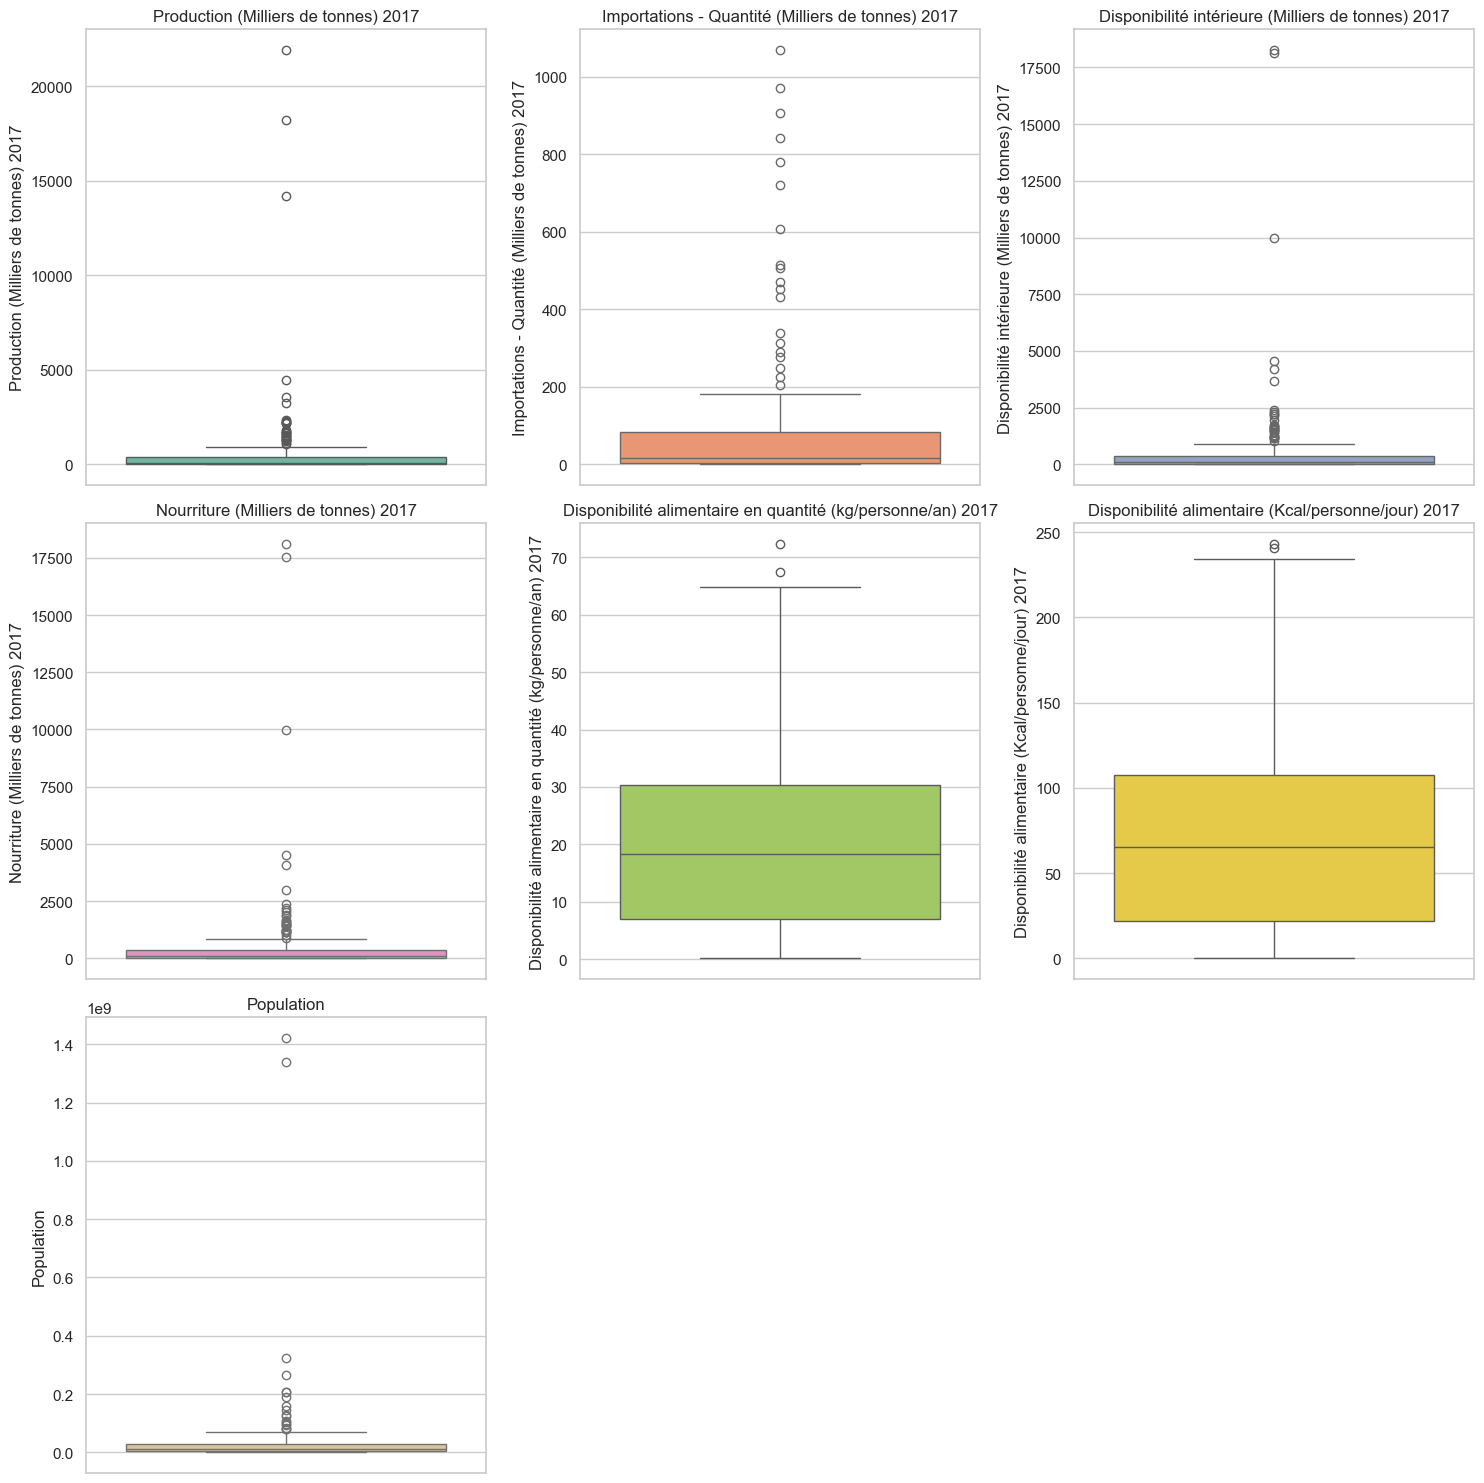

In [34]:
# Configuration du style des graphiques
sns.set(style="whitegrid")

# Déterminer le nombre de variables et configurer la grille de sous-graphiques
num_vars = len(etudemarche.columns)
num_rows = num_vars // 3 + (num_vars % 3 > 0)  # 3 colonnes par rangée

# Créer une figure pour accueillir tous les sous-graphiques
plt.figure(figsize=(15, num_rows * 5))  # Largeur fixe, hauteur variable en fonction du nombre de rangées

# Itérer sur les colonnes pour créer un boxplot pour chaque variable
for i, column in enumerate(etudemarche.columns):
    plt.subplot(num_rows, 3, i + 1)  # Création d'un sous-graphique pour chaque variable
    sns.boxplot(y=etudemarche[column], color=sns.color_palette("Set2")[i % 8])  # Utilisation de différentes couleurs
    plt.title(column)  # Ajout d'un titre pour chaque graphique

# Ajustement automatique du layout pour éviter le chevauchement
plt.tight_layout()

# Enregistrement avec fond transparent
plt.savefig('boxplot_projet9.png', bbox_inches='tight', dpi=300, transparent=True)


plt.show()

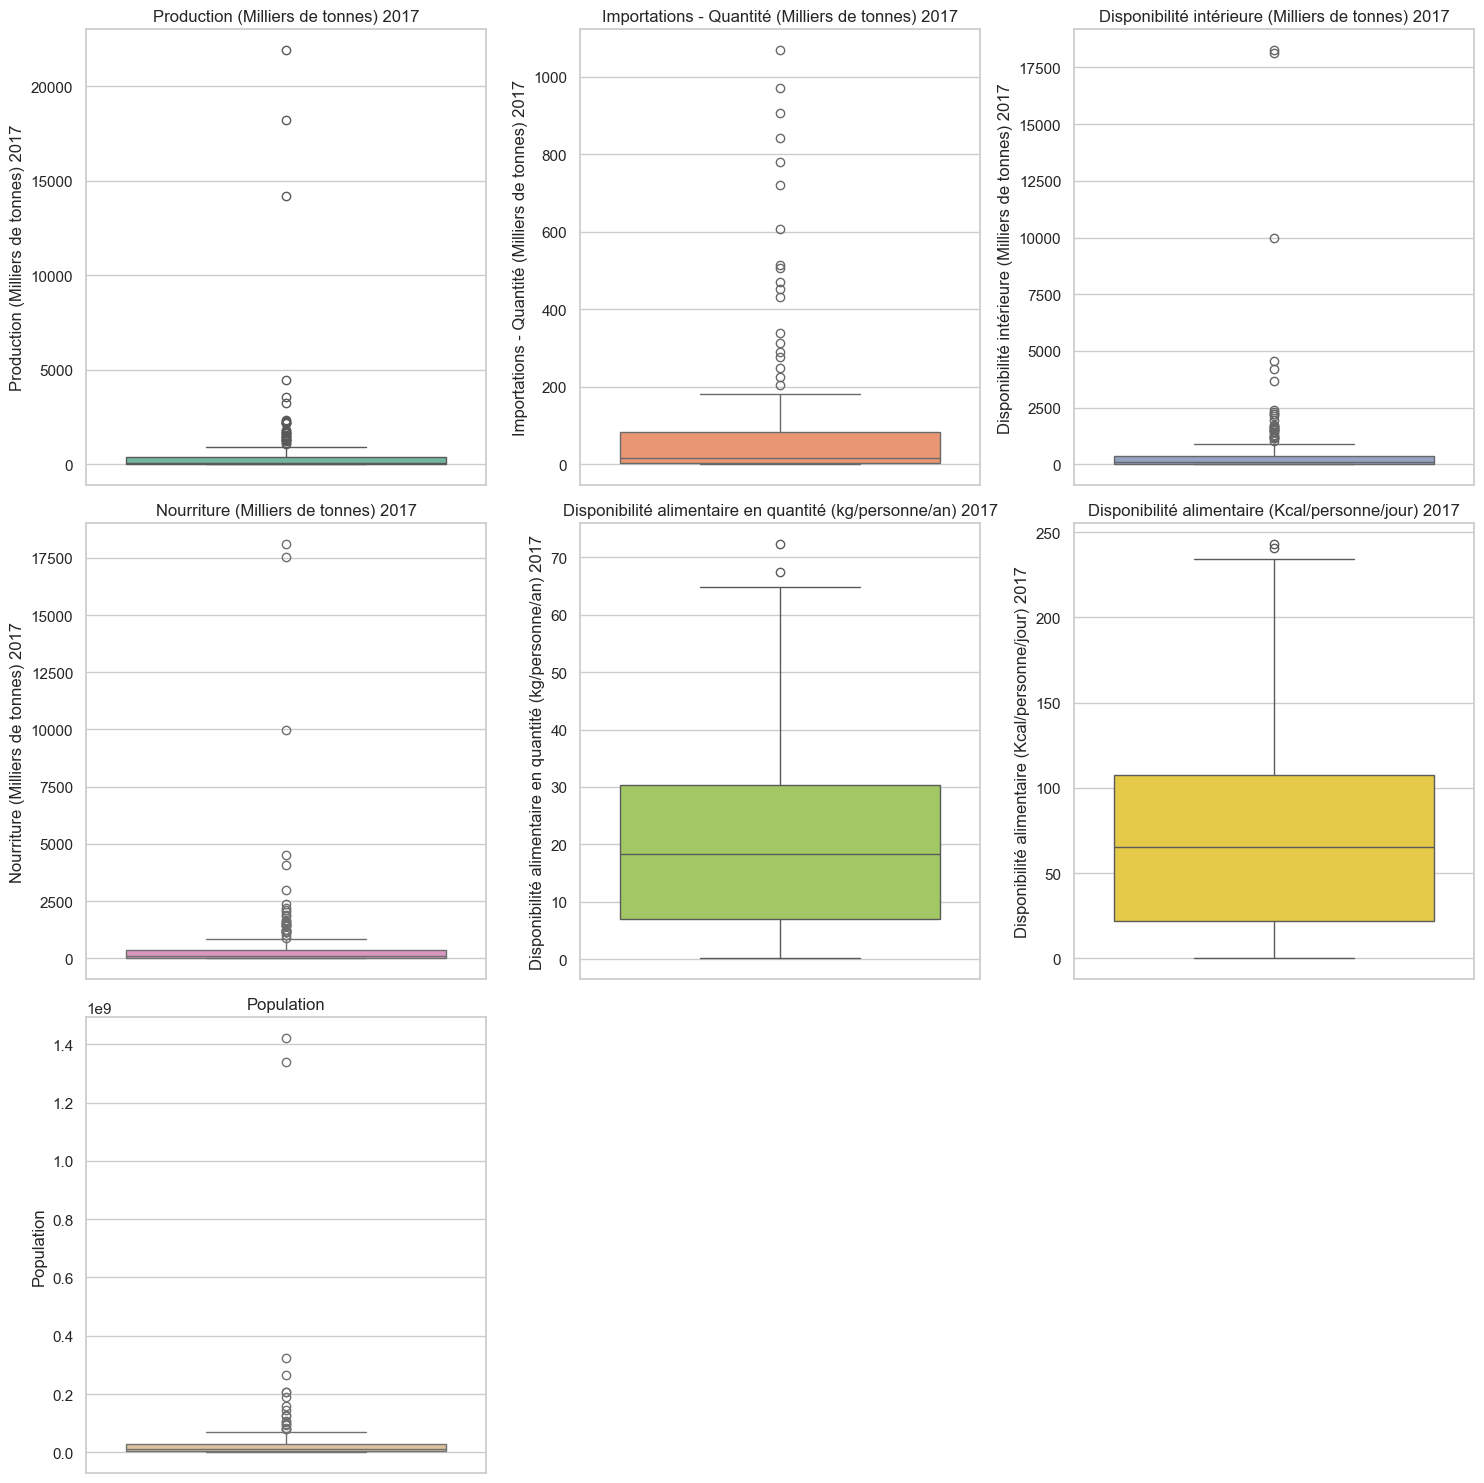

In [35]:
# Configuration du style des graphiques
sns.set(style="whitegrid")

# Déterminer le nombre de variables et configurer la grille de sous-graphiques
num_vars = len(etudemarche.columns)
num_rows = num_vars // 3 + (num_vars % 3 > 0)  # 3 colonnes par rangée

# Créer une figure pour accueillir tous les sous-graphiques
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
fig.patch.set_alpha(0)  # Rendre le fond de la figure transparent

# Palette de couleurs pour les boxplots
colors = sns.color_palette("Set2", num_vars)

# Itérer sur les colonnes pour créer un boxplot pour chaque variable
for i, column in enumerate(etudemarche.columns):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    sns.boxplot(y=etudemarche[column], color=colors[i % 8], ax=ax)  # Utilisation de différentes couleurs
    ax.set_title(column)  # Ajout d'un titre pour chaque graphique
    ax.patch.set_alpha(0)  # Rendre le fond de chaque sous-graphe transparent

# Supprimer les axes inutilisés si le nombre de graphiques est inférieur à num_rows * 3
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

# Ajustement automatique du layout pour éviter le chevauchement
plt.tight_layout()

# Enregistrement avec fond transparent
plt.savefig('boxplot_projet9.png', bbox_inches='tight', dpi=300, transparent=True)

# Affichage des graphiques
plt.show()


<h4 id="normalite" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">5.1.3 - Analyse de la normalité</h4>
<hr style="border: 1px solid #0074CC;">

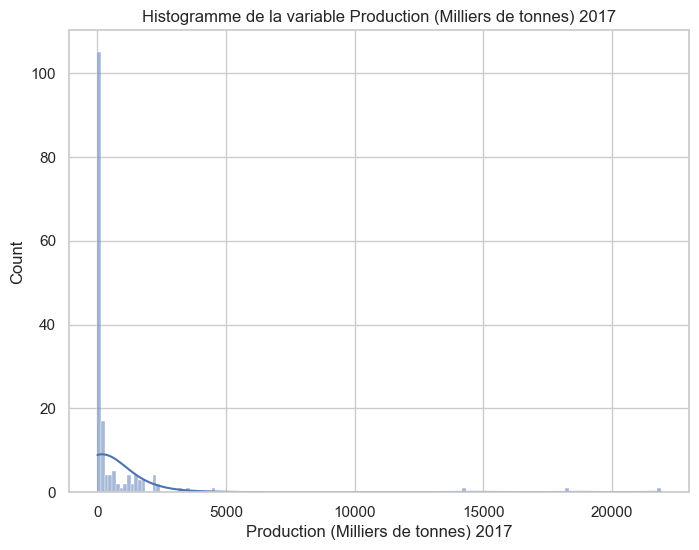

La variable Production (Milliers de tonnes) 2017 ne suit pas une loi normale (p-value=0.000)


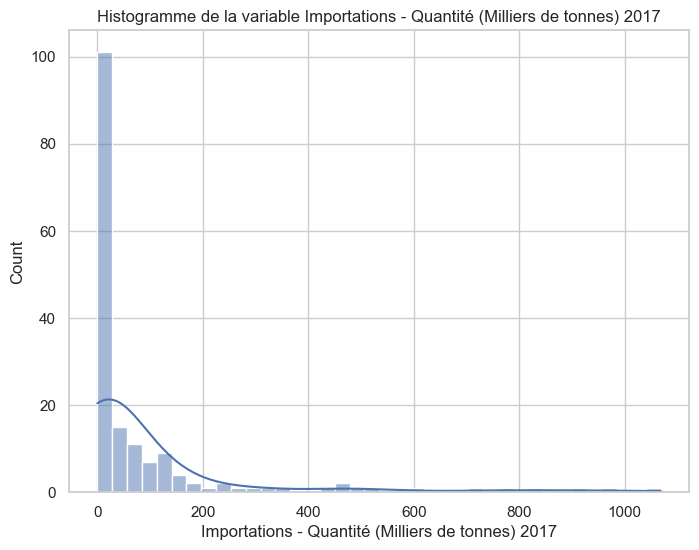

La variable Importations - Quantité (Milliers de tonnes) 2017 ne suit pas une loi normale (p-value=0.000)


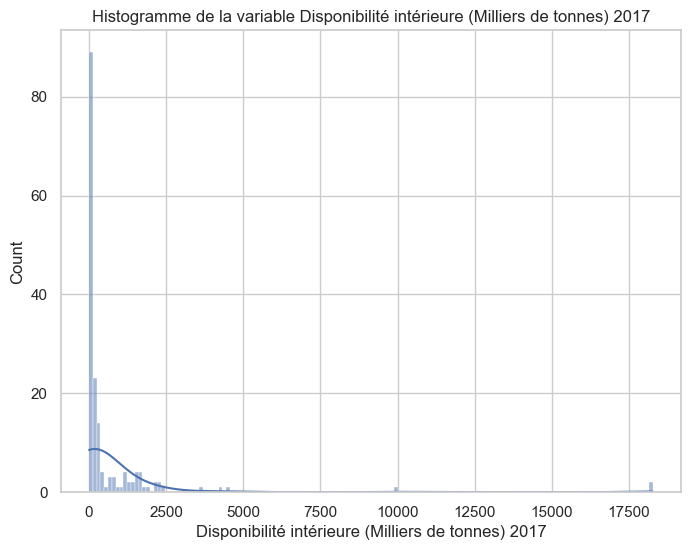

La variable Disponibilité intérieure (Milliers de tonnes) 2017 ne suit pas une loi normale (p-value=0.000)


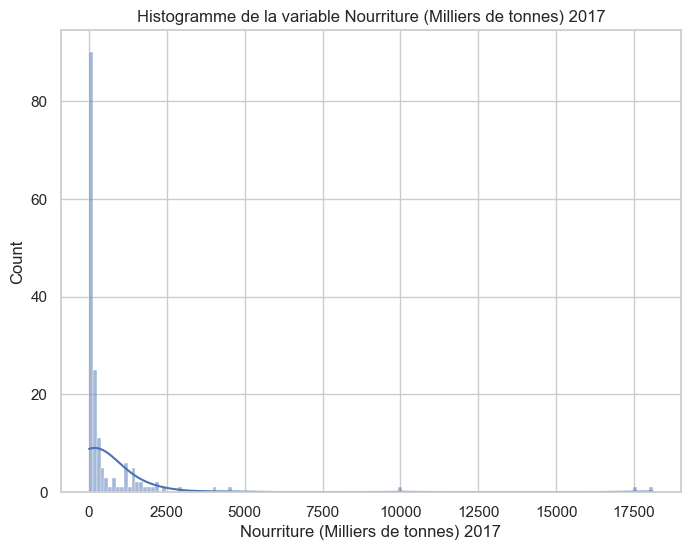

La variable Nourriture (Milliers de tonnes) 2017 ne suit pas une loi normale (p-value=0.000)


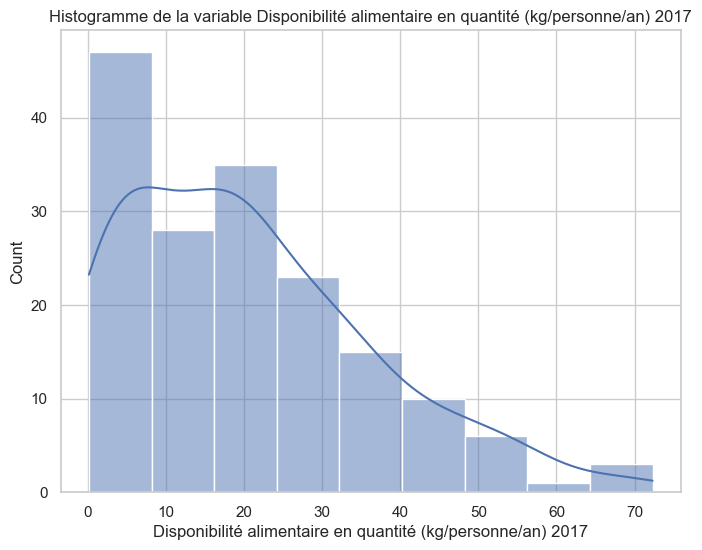

La variable Disponibilité alimentaire en quantité (kg/personne/an) 2017 ne suit pas une loi normale (p-value=0.000)


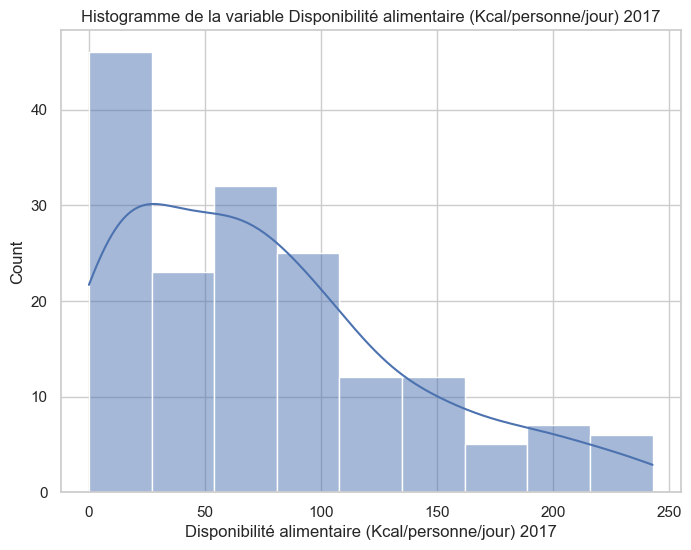

La variable Disponibilité alimentaire (Kcal/personne/jour) 2017 ne suit pas une loi normale (p-value=0.000)


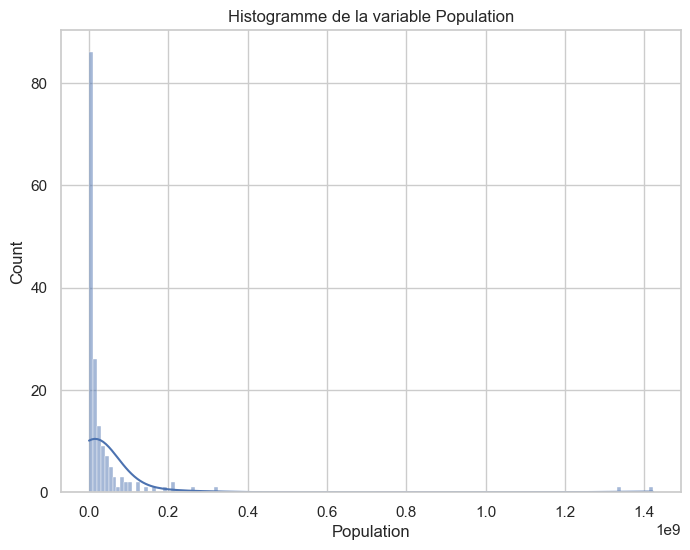

La variable Population ne suit pas une loi normale (p-value=0.000)


In [36]:
# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in etudemarche.columns:
    # Affichage de l'histogramme
    plt.figure(figsize=(8, 6))
    sns.histplot(etudemarche[column], kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    # Réalisation du test de normalité
    statistic, p_value = stats.normaltest(etudemarche[column].dropna())

    # Affichage du résultat du test
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value:.3f})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value:.3f})")


<h3 id="bivarie" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">5.2 - Analyse bivariée</h3>
<hr style="border: 1px solid #0074CC;">

<h4 id="heatmap" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">5.2.1 - heatmap</h4>
<hr style="border: 1px solid #0074CC;">

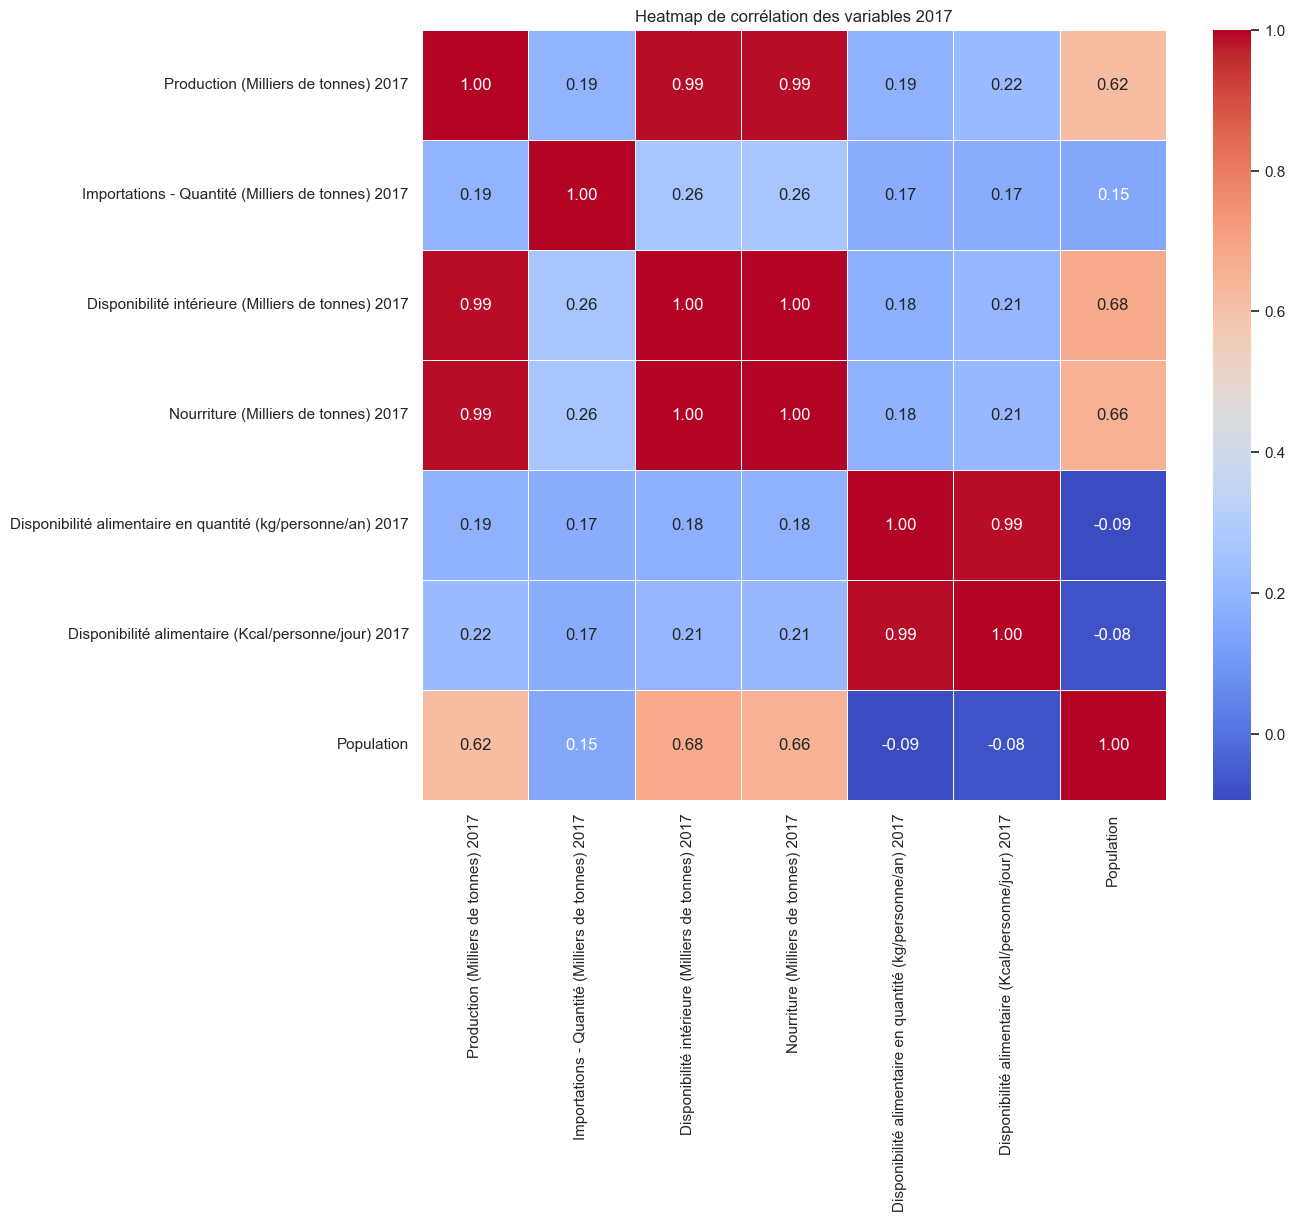

In [37]:
numeric_data = etudemarche.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
correlation_matrix = numeric_data.corr()

# Création du heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=.5)

plt.savefig('heatmap9.png', format='png', dpi=200, bbox_inches='tight')
plt.title('Heatmap de corrélation des variables 2017')
plt.savefig('headmap_projet9.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()


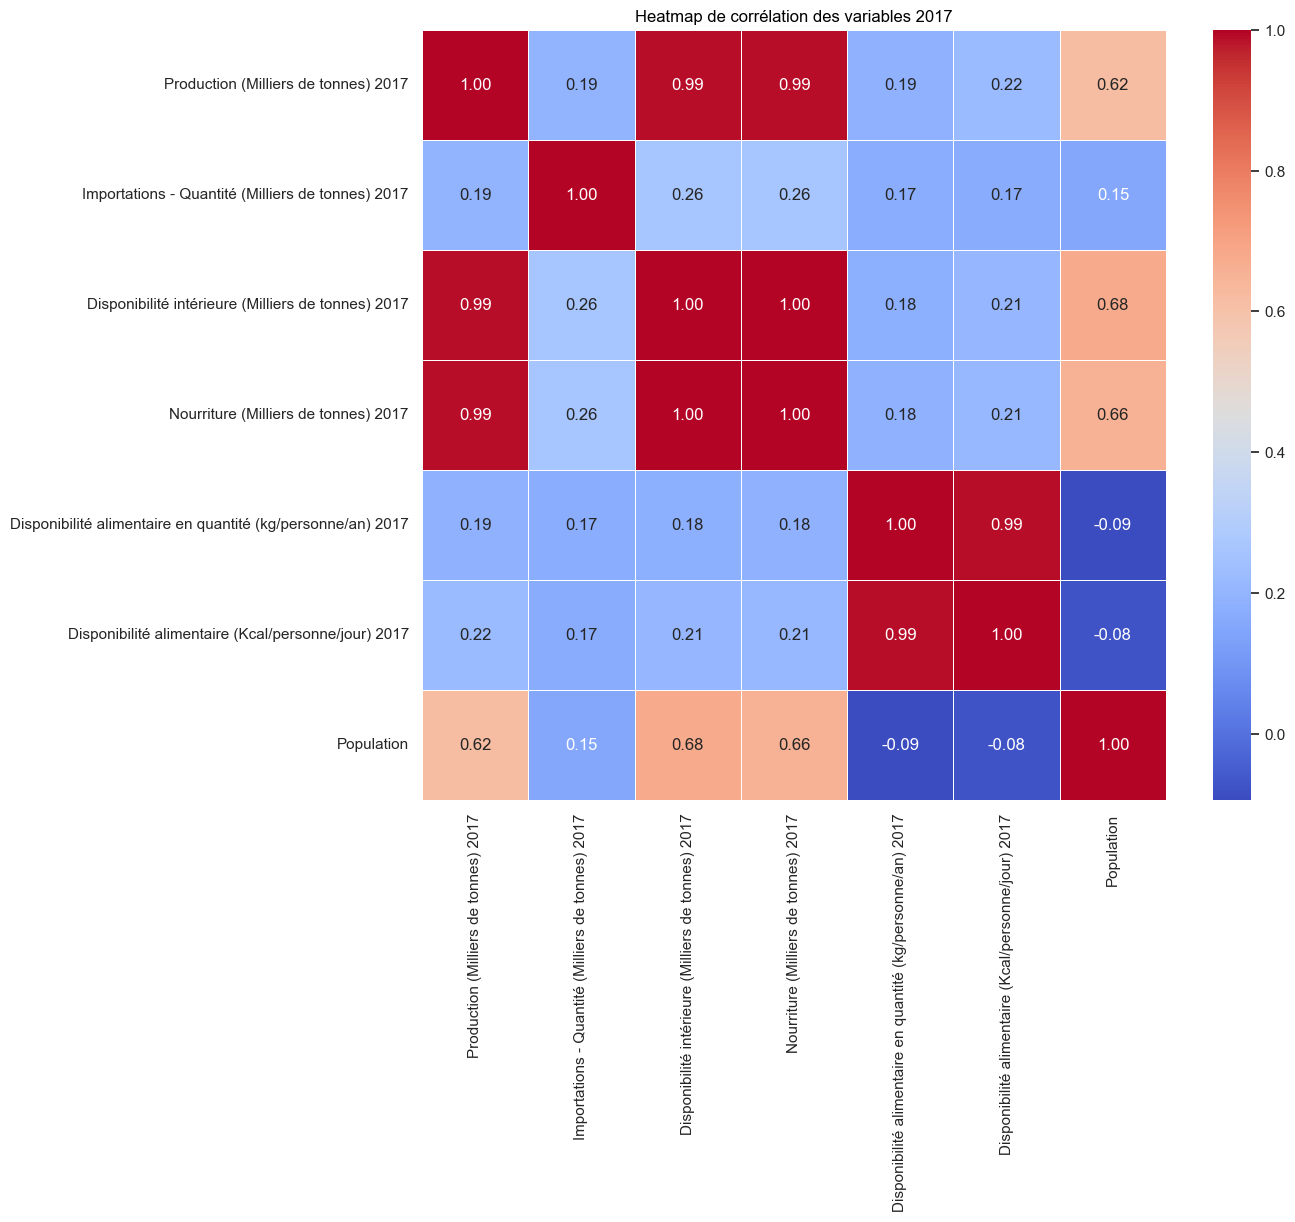

In [38]:
# Sélection des données numériques
numeric_data = etudemarche.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
correlation_matrix = numeric_data.corr()

# Création du heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=.5)

# Rendre le fond des axes et de la figure transparent
heatmap.figure.patch.set_alpha(0)  # Fond de la figure transparent
heatmap.axes.patch.set_alpha(0)  # Fond des axes transparent

plt.title('Heatmap de corrélation des variables 2017', color='black')

# Enregistrement avec fond transparent
plt.savefig('heatmap9.png', format='png', dpi=200, bbox_inches='tight', transparent=True)
plt.savefig('headmap_projet9.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()


<h4 id="dataset-final" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">5.2.2 - Nettoyage des données du data set final</h4>
<hr style="border: 1px solid #0074CC;">

In [39]:
columns_to_exclude = ['Disponibilité alimentaire en quantité (kg/personne/an) 2017', 'Disponibilité intérieure (Milliers de tonnes) 2017', 'Disponibilité alimentaire (Kcal/personne/jour) 2017']
etudemarche = etudemarche.drop(columns=columns_to_exclude)

etudemarche.head()

Production (Milliers de tonnes) 2017  \
Zone                                                   
Afghanistan                                     28.0   
Afrique du Sud                                1667.0   
Albanie                                         13.0   
Algérie                                        275.0   
Allemagne                                     1514.0   

                Importations - Quantité (Milliers de tonnes) 2017  \
Zone                                                                
Afghanistan                                                  29.0   
Afrique du Sud                                              514.0   
Albanie                                                      38.0   
Algérie                                                       2.0   
Allemagne                                                   842.0   

                Nourriture (Milliers de tonnes) 2017  Population  
Zone                                                              
Afghanistan                                     55.0    36296113  
Afrique du Sud                                2035.0    57009756  
Albanie                                         47.0     2884169  
Algérie                                        264.0    41389189  
Allemagne                                     1609.0    82658409

<h3 id="multidimensionnelle" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">5.2 - Analyse exploratoire multidimensionnelle</h3>
<hr style="border: 1px solid #0074CC;">

<h4 id="acp" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">5.2.1 - Construction de l'ACP</h4>
<hr style="border: 1px solid #0074CC;">

<h4 style=" font-weight: bold; color: #ED0010; padding-left: 10px;"> Préparation des données </h4>

In [40]:
etudemarche.columns = etudemarche.columns.map(str)
numeric_cols = etudemarche.select_dtypes(include=[np.number])
scaler = StandardScaler()
etudemarche_scaled = scaler.fit_transform(numeric_cols)
etudemarche_scaled = pd.DataFrame(etudemarche_scaled, columns=numeric_cols.columns)
# Affichage de la description des données normalisées
print(etudemarche_scaled.describe().round(2))

       Production (Milliers de tonnes) 2017  \
count                                168.00   
mean                                  -0.00   
std                                    1.00   
min                                   -0.29   
25%                                   -0.29   
50%                                   -0.26   
75%                                   -0.13   
max                                    8.50   

       Importations - Quantité (Milliers de tonnes) 2017  \
count                                             168.00   
mean                                               -0.00   
std                                                 1.00   
min                                                -0.48   
25%                                                -0.47   
50%                                                -0.40   
75%                                                -0.04   
max                                                 5.23   

       Nourriture (Milliers de tonn

In [41]:
# Enregistrement des noms de pays et des colonnes
names = etudemarche.index
features = numeric_cols.columns

<h4 style=" font-weight: bold; color: #ED0010; padding-left: 10px;"> ACP </h4>

In [42]:
# Application de l'ACP
pca = PCA()
etudemarche_pca = pca.fit_transform(etudemarche_scaled)
scree = (pca.explained_variance_ratio_ * 100).round(2)
scree_cum = scree.cumsum().round()

<h4 style=" font-weight: bold; color: #ED0010; padding-left: 10px;"> Eboulis des valeurs propres </h4>

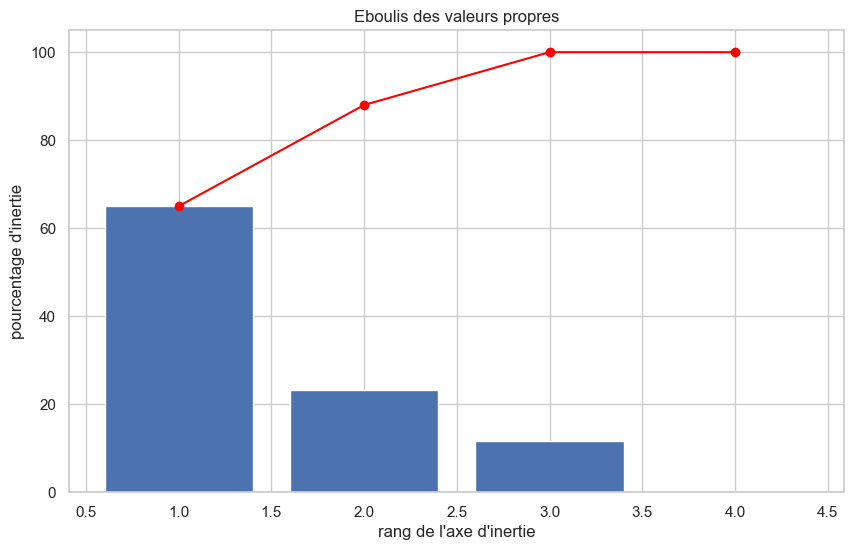

In [43]:
# Visualisation de l'Eboulis des Valeurs Propres
plt.figure(figsize=(10, 6))
etudemarche_list = range(1, len(scree) + 1)
plt.bar(etudemarche_list, scree)
plt.plot(etudemarche_list, scree_cum, c="red", marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig('eboulis.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

<h4 style=" font-weight: bold; color: #ED0010; padding-left: 10px;"> Matrice des composantes principales </h4>

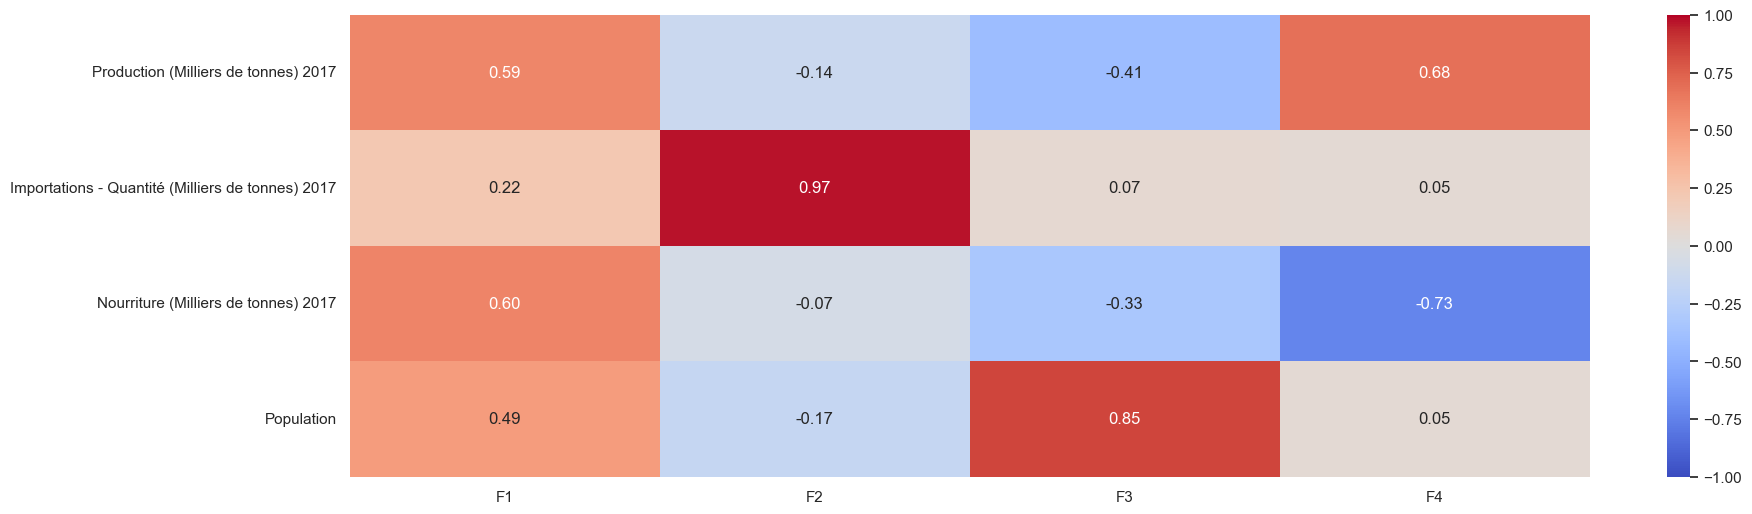

In [44]:
# Matrice des composantes principales
pcs = pd.DataFrame(pca.components_, columns=features, index=[f"F{i+1}" for i in range(len(features))]).round(2)
fig, ax = plt.subplots(figsize=(20, 6))
heatmap = sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt=".2f")

# Modifier la couleur du texte de la colorbar
# colorbar = heatmap.collections[0].colorbar
# colorbar.ax.yaxis.set_tick_params(color='white')
# plt.setp(plt.getp(colorbar.ax.axes, 'yticklabels'), color='white')

# Modifier la couleur des labels des axes
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')

# Sauvegarder le graphique avec un fond transparent
plt.savefig('matrice.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

<h4 style=" font-weight: bold; color: #ED0010; padding-left: 10px;"> Cercle des corrélations </h4>

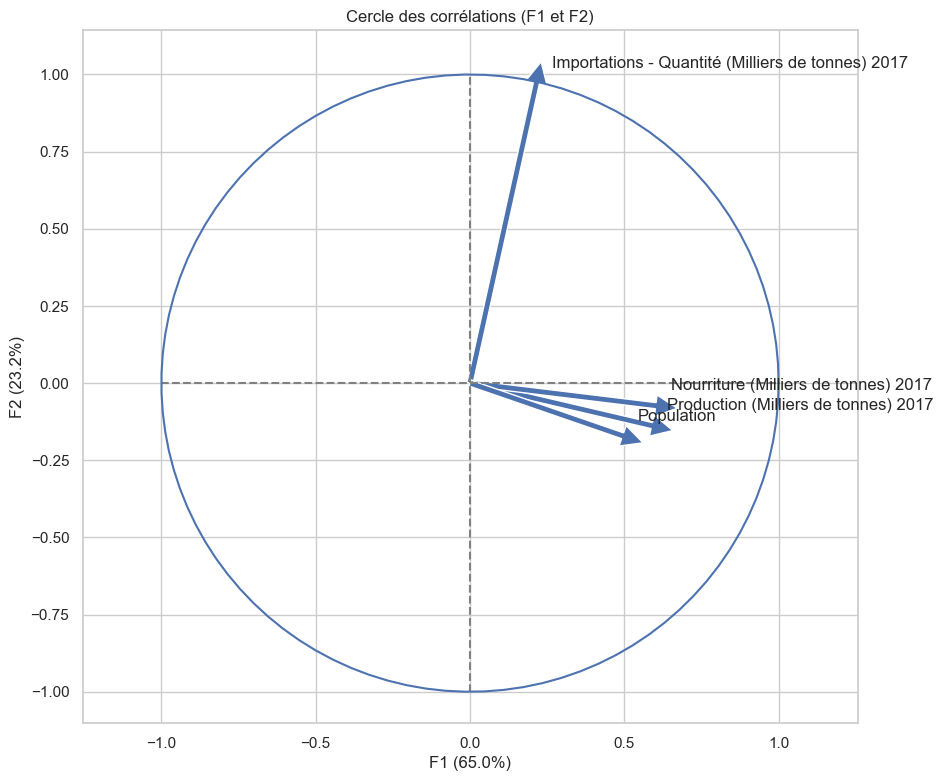

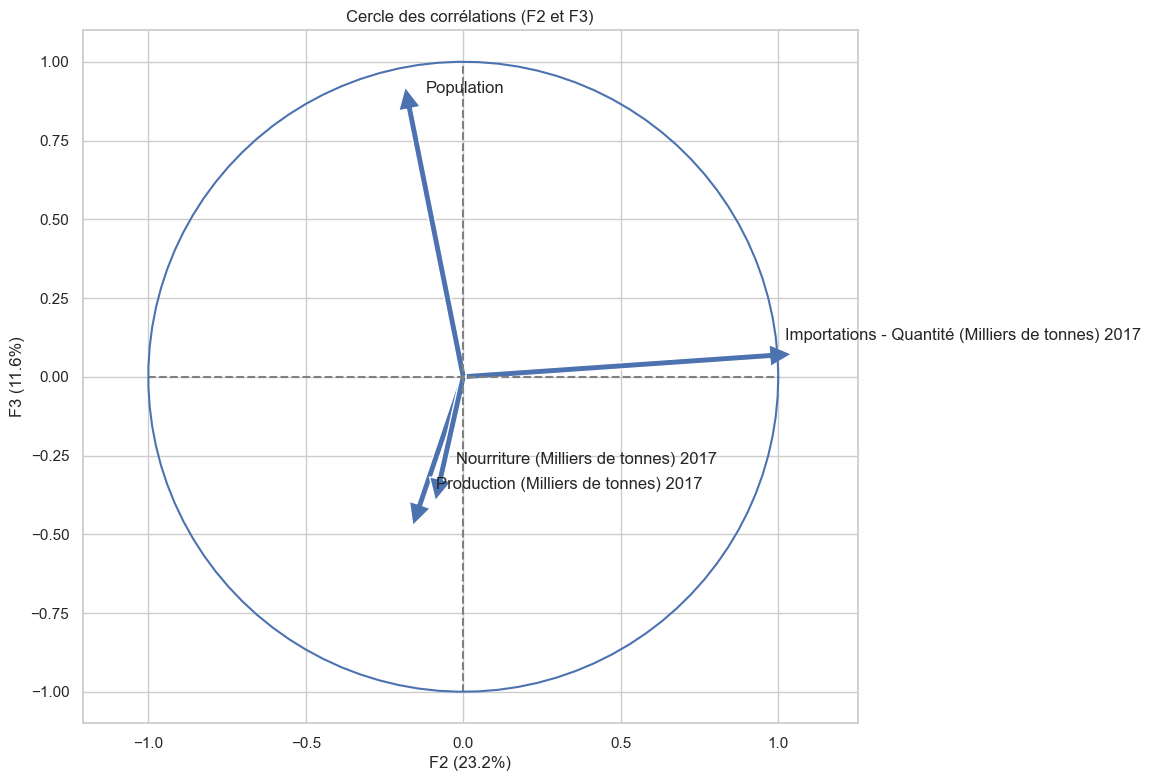

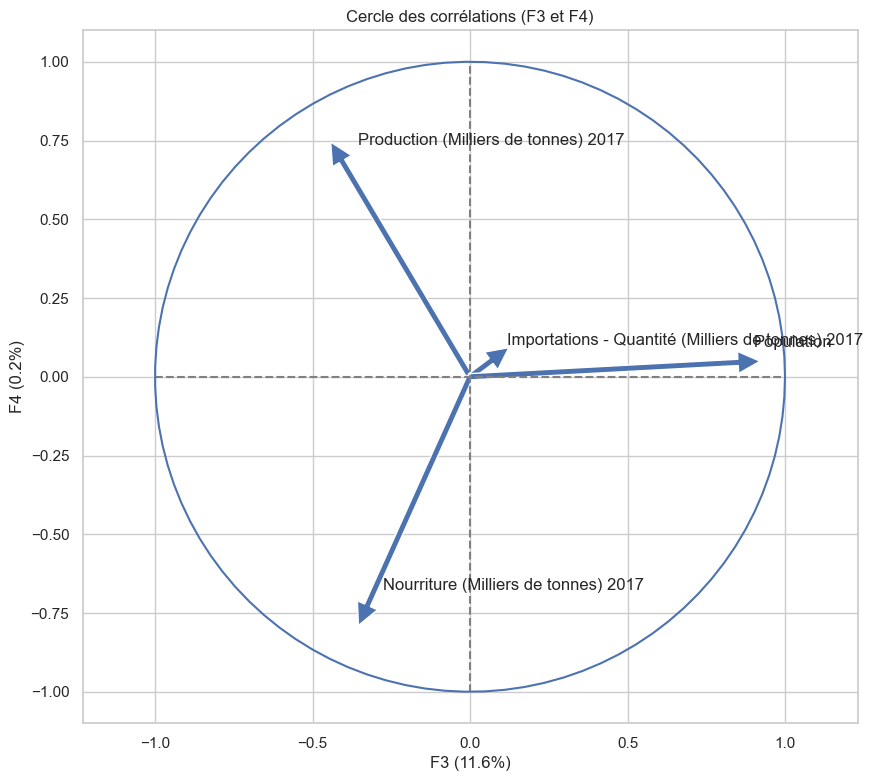

In [45]:
def correlation_graph(pca, x_y, features):
    x, y = x_y
    fig, ax = plt.subplots(figsize=(10, 9))

    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0, 0, pca.components_[x, i], pca.components_[y, i], head_width=0.07, head_length=0.07, width=0.02)
        plt.text(pca.components_[x, i] + 0.05, pca.components_[y, i] + 0.05, features[i])

    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    plt.xlabel(f'F{x+1} ({round(100*pca.explained_variance_ratio_[x], 1)}%)')
    plt.ylabel(f'F{y+1} ({round(100*pca.explained_variance_ratio_[y], 1)}%)')
    plt.title(f"Cercle des corrélations (F{x+1} et F{y+1})")
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.savefig('cerclecorrelation.png', bbox_inches='tight', dpi=300)
    plt.show()

# Cercle des corrélations F1 et F2
correlation_graph(pca, (0, 1), features)

# Cercle des corrélations F2 et F3
correlation_graph(pca, (1, 2), features)

# Cercle des corrélations F3 et F4
correlation_graph(pca, (2, 3), features)

<h4 style=" font-weight: bold; color: #ED0010; padding-left: 10px;"> Projection des individus </h4>

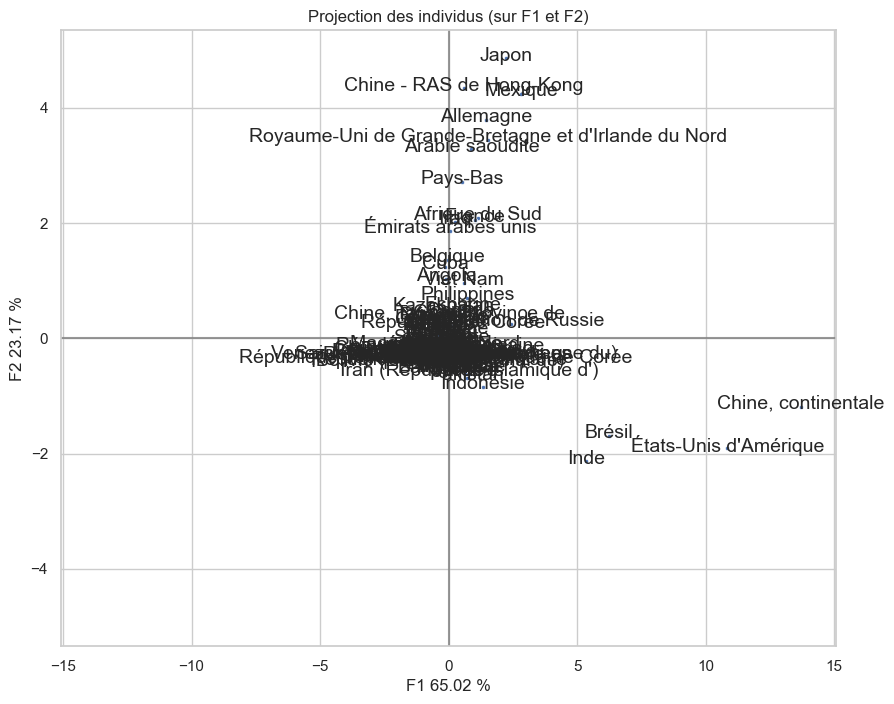

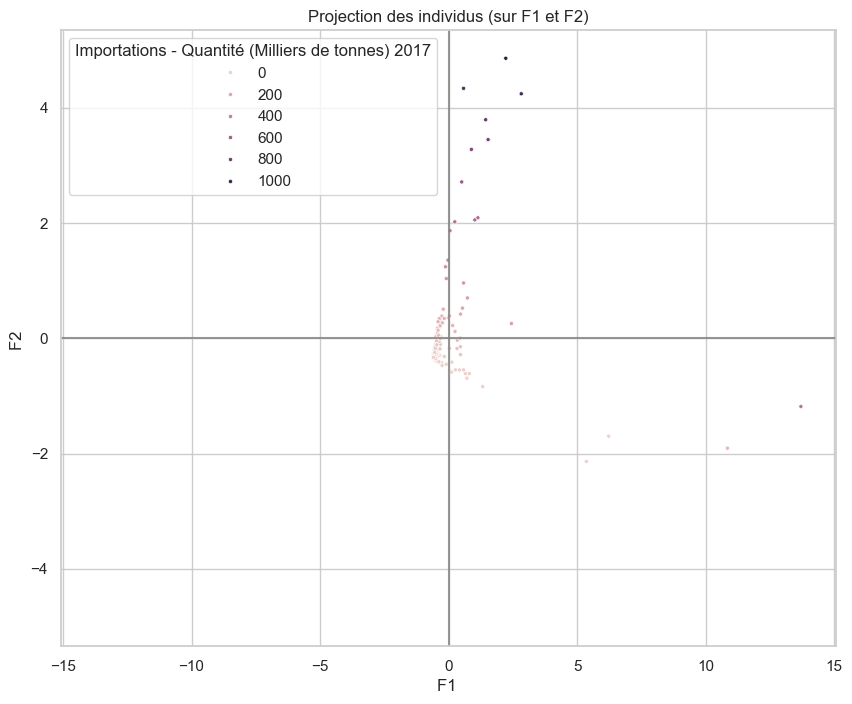

In [46]:
# Fonction pour afficher la projection des individus
def display_factorial_planes(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[10, 8], marker="."):
    X_ = np.array(X_projected)
    if not figsize:
        figsize = (7, 6)
    if labels is None:
        labels = []
    if not len(x_y) == 2:
        raise AttributeError("2 axes sont demandées")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("la variable axis n'est pas bonne")
    x, y = x_y
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    c = None if clusters is None else clusters
    sns.scatterplot(x=X_[:, x], y=X_[:, y], hue=c, alpha=alpha, marker=marker)
    v1 = v2 = ''
    if pca:
        v1 = str(round(100 * pca.explained_variance_ratio_[x], 2)) + " %"
        v2 = str(round(100 * pca.explained_variance_ratio_[y], 2)) + " %"
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1
    ax.set_xlim(-x_max, x_max)
    ax.set_ylim(-y_max, y_max)
    plt.axhline(0, color='grey', alpha=0.8)
    plt.axvline(0, color='grey', alpha=0.8)
    if labels:
        for i, (_x, _y) in enumerate(X_[:, [x, y]]):
            plt.text(_x, _y + 0.05, labels[i], fontsize='14', ha='center', va='center')
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.savefig('projectionindividus.png', bbox_inches='tight', dpi=300, transparent=True)
    plt.show()

# Projection des individus sur F1 et F2
display_factorial_planes(X_projected=etudemarche_pca, x_y=[0, 1], pca=pca, labels=etudemarche.index.tolist())

# Projection des individus sur F3 et F4 avec cluster importation
display_factorial_planes(etudemarche_pca, [0, 1], clusters=etudemarche['Importations - Quantité (Milliers de tonnes) 2017'])

In [47]:
print(etudemarche.index)

# Si l'index est une colonne significative comme 'Zone', réinitialisez-le
if isinstance(etudemarche.index, pd.MultiIndex) or 'Zone' not in etudemarche.columns:
    etudemarche = etudemarche.reset_index()
# Exporter en CSV sans inclure l'index
etudemarche.to_csv('etudemarche.csv', index=False)

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=168)
